In [3]:
import pandas as pd
import numpy as np

In [53]:
enem = pd.read_json(r'C:\Users\alice\Desktop\banco\enem_2023.json')
enem.head(5)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [54]:
enem = enem.dropna()

In [57]:
colunas_n = list(enem.columns)
colunas_n = colunas[0:5]
colunas_n

['Linguagens',
 'Ciências humanas',
 'Ciências da natureza',
 'Matemática',
 'Redação']

In [59]:
# Disciplina com maior amplitude de nota 
amplitude  = []
for i in colunas_n:
        x = enem[i].max() - enem[i].min()
        amplitude.append(x)
        print(amplitude)

[517.4563171927]
[517.4563171927, 474.0196954613]
[517.4563171927, 474.0196954613, 487.60456835130003]
[517.4563171927, 474.0196954613, 487.60456835130003, 488.0779018921]
[517.4563171927, 474.0196954613, 487.60456835130003, 488.0779018921, 640.9966668267]


In [65]:
#Qual é a média e a mediana para cada uma das disciplinas?
medias = []
medianas = []
for i in colunas_n:
    if enem[i].dtype in ['float64', 'int64']: 
        x = enem[i].mean()
        y = enem[i].median()
        medias.append(x)
        medianas.append(y)
     
    else:
        print(f"Coluna '{column}' não é numérica.")
print("Médias:", medias)
print("Medianas:", medianas)


Médias: [517.4671621383919, 528.3514542155492, 502.1421008280387, 537.1724797842871, 641.1931234629291]
Medianas: [517.1288314442, 528.50326342525, 502.93520944194995, 532.9614855364, 639.60269114995]


In [82]:
peso = [2, 1, 1, 4, 2]
pesos = list(zip(colunas_n, peso))
pesos = dict(pesos)
pesos

{'Linguagens': 2,
 'Ciências humanas': 1,
 'Ciências da natureza': 1,
 'Matemática': 4,
 'Redação': 2}

In [101]:
df_UFPE = enem.copy()
df_UFPE = df_UFPE.dropna()
for coluna, peso in pesos.items():
    if coluna in df_UFPE.columns:
        df_UFPE[coluna] *= peso

        
df_UFPE['Nota Ponderada'] = df_UFPE.loc[:, list(pesos.keys())].sum(axis=1)


df_top500 = df_UFPE.sort_values(by='Nota Ponderada', ascending=False).head(500)

# Calcular média e desvio padrão das notas ponderadas
media = df_top500['Nota Ponderada'].mean()
desvio_padrao = df_top500['Nota Ponderada'].std()

print(f"Média das notas ponderadas dos 500 melhores estudantes: {media}")
print(f"Desvio padrão das notas ponderadas dos 500 melhores estudantes: {desvio_padrao}")



Média das notas ponderadas dos 500 melhores estudantes: 5572.896772018768
Desvio padrão das notas ponderadas dos 500 melhores estudantes: 404.3586629946426


In [107]:
#questão 4
aprovados = df_UFPE.sort_values(by='Nota Ponderada', ascending=False).head(40)
medias_aprovados = aprovados['Nota Ponderada'].mean()
variancia_aprovado = aprovados['Nota Ponderada'].var()

print('A médias so alunas aprovados é', medias_aprovados, ' e a variância é', variancia_aprovado)

A médias so alunas aprovados é 6366.827415075187  e a variância é 29576.75036004101


In [116]:
#questão 5
m = aprovados['Matemática'].quantile(.75)
l = aprovados['Linguagens'].quantile(.75)
print('valor do teto do terceiro quartil para as disciplinas de matemática e linguagens é respectimente:', m, l)

valor do teto do terceiro quartil para as disciplinas de matemática e linguagens é respectimente: 2880.173266156 1340.1405144505002


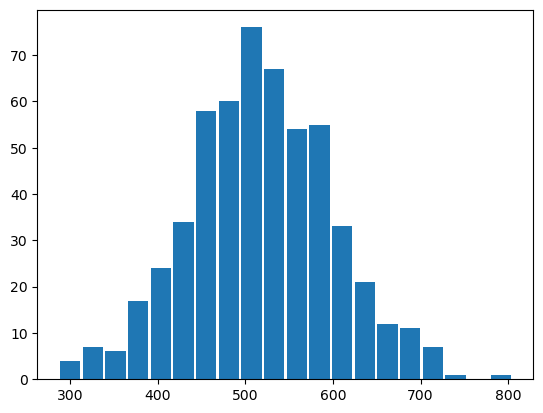

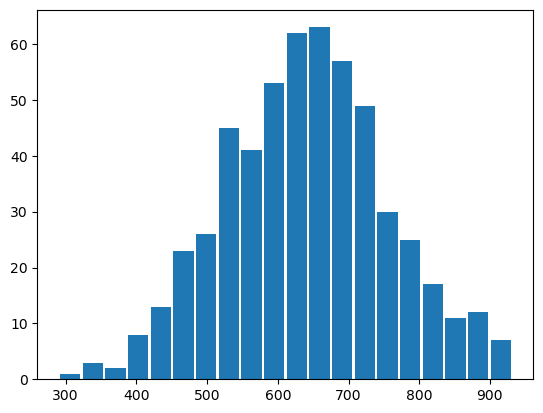

In [120]:
#questão 6
import matplotlib.pyplot as plt
plt.hist(enem['Linguagens'], 20, rwidth=0.9)
plt.show()
plt.hist(enem['Redação'], 20, rwidth=0.9)
plt.show()
# ambas as cruvas são simétricas parecidas com a curva de gauciana, apresentando a maioria dos seus dados em torno da média.


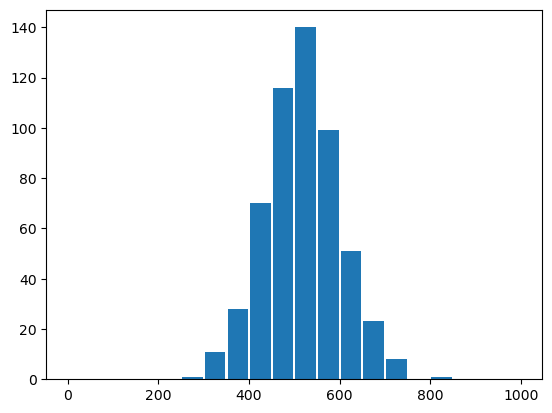

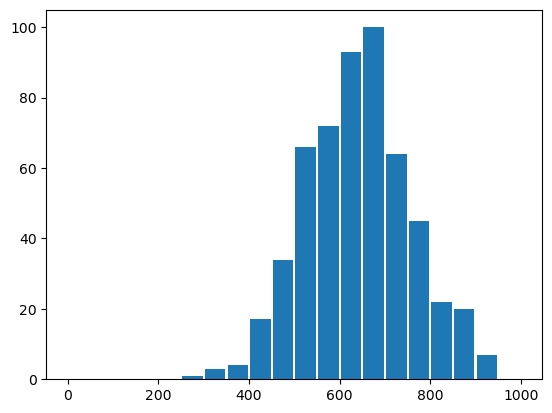

In [125]:
#quetão 7
plt.hist(enem['Linguagens'],  20, rwidth=0.9, range=[0, 1000])
plt.show()
plt.hist(enem['Redação'],  20, rwidth=0.9, range=[0, 1000])
plt.show()
#ambas as curva continuam simetras, porém a curva de Radeção apresenta uma leve assimetria para esquerda mostrando uma tendencia maior a notas abaixo de 700

<AxesSubplot:>

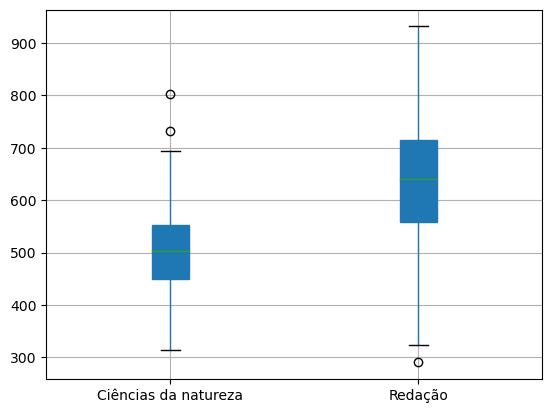

In [132]:
#Questão 8
enem.boxplot(column=['Ciências da natureza', 'Redação'], patch_artist=True)
# sim é possivel ver o outiliers

In [157]:
#questão 9 - removendo outliers pelo método IQR
def find_outlier_iqr(dataset, colname):
    q25 = np.quantile(dataset[colname], 0.25)
    q75 = np.quantile(dataset[colname], 0.75)
    iqr = q75 - q25
    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
    return lower, upper
def drop_outliers(dataset, colname):
    lower, upper = find_outlier_iqr(dataset, colname)
    # Remove os outliers baseando-se nos limites calculados
    return dataset[(dataset[colname] >= lower) & (dataset[colname] <= upper)]


In [155]:
#questão 9
out = find_outlier_iqr(enem, 'Redação')

 IQR é  157.02513490047488
Valor minimo 322.98725564181274
Valor maximo 951.0877952437122


In [158]:
def verificar_significancia(dataset, threshold=5):
    resultados = {}
    
    for colname in dataset.select_dtypes(include=np.number).columns:
        media_original = dataset[colname].mean()     
        
        dataset_clean = drop_outliers(dataset, colname)
        
        # Calcular a média ajustada
        media_ajustada = dataset_clean[colname].mean()
        
        # Calcular a diferença percentual
        diferenca_percentual = ((media_original - media_ajustada) / media_original) * 100
        
        # Verificar se a diferença é significativa
        significativa = diferenca_percentual > threshold
        
        resultados[colname] = {
            'Média Original': media_original,
            'Média Ajustada': media_ajustada,
            'Diferença Percentual': diferenca_percentual,
            'Diferença Significativa': significativa
        }
    
    return resultados

# Verificar a diferença significativa para todas as colunas
resultados = verificar_significancia(enem)

# Exibir resultados
for coluna, info in resultados.items():
    print(f"Coluna: {coluna}")
    print(f"  Média Original: {info['Média Original']:.2f}")
    print(f"  Média Ajustada: {info['Média Ajustada']:.2f}")
    print(f"  Diferença Percentual: {info['Diferença Percentual']:.2f}%")
    print(f"  Diferença Significativa? {'Sim' if info['Diferença Significativa'] else 'Não'}")
    print()

Coluna: Linguagens
  Média Original: 517.47
  Média Ajustada: 517.36
  Diferença Percentual: 0.02%
  Diferença Significativa? Não

Coluna: Ciências humanas
  Média Original: 528.35
  Média Ajustada: 527.95
  Diferença Percentual: 0.08%
  Diferença Significativa? Não

Coluna: Ciências da natureza
  Média Original: 502.14
  Média Ajustada: 501.17
  Diferença Percentual: 0.19%
  Diferença Significativa? Não

Coluna: Matemática
  Média Original: 537.17
  Média Ajustada: 535.73
  Diferença Percentual: 0.27%
  Diferença Significativa? Não

Coluna: Redação
  Média Original: 641.19
  Média Ajustada: 641.83
  Diferença Percentual: -0.10%
  Diferença Significativa? Não



In [24]:
#quet+stão 10 
#identificando valores ausentes 
enem_o = pd.read_json(r'C:\Users\alice\Desktop\banco\enem_2023.json')
enem_o.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [41]:
#opção 1: subistituindo pela média
enem_o.fillna(enem_o.mean(numeric_only=True), inplace=True)
numericas = enem_o.select_dtypes(include='number')
numericas.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,79.560718,75.277806,71.486677,83.286987,106.953175
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,464.362445,479.418513,459.456673,485.234093,571.697962
50%,514.524809,527.042281,499.315583,535.965660,637.783532
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [45]:
enem_o.fillna(enem_o.median(numeric_only=True), inplace=True)
numericas = enem_o.select_dtypes(include='number')
numericas.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,79.560718,75.277806,71.486677,83.286987,106.953175
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,464.362445,479.418513,459.456673,485.234093,571.697962
50%,514.524809,527.042281,499.315583,535.965660,637.783532
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [46]:
enem_o.fillna(enem_o.mode(numeric_only=True), inplace=True)
numericas = enem_o.select_dtypes(include='number')
numericas.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,79.560718,75.277806,71.486677,83.286987,106.953175
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,464.362445,479.418513,459.456673,485.234093,571.697962
50%,514.524809,527.042281,499.315583,535.965660,637.783532
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
# as 3 oção se mantiveram semelhante, logo devemos considerar que os dados tem uma dis